# Latar Belakang
Supermarket saat ini menghadapi tantangan dalam mempertahankan pelanggan di tengah meningkatnya persaingan dan perubahan pola belanja. Pelanggan yang loyal memiliki nilai jauh lebih tinggi karena biaya untuk mempertahankan pelanggan lebih rendah dibandingkan memperoleh pelanggan baru.

Dengan memanfaatkan data transaksi pelanggan, supermarket dapat melakukan analisis perilaku pembelian menggunakan metode RFM (Recency, Frequency, Monetary) untuk mengidentifikasi pelanggan yang paling berkontribusi, pelanggan berisiko berhenti, dan calon pelanggan potensial.


## Pernyataan Masalah
* Mengelompokkan pelanggan berdasarkan perilaku belanja menggunakan metode RFM
* Mengidentifikasi pelanggan paling loyal serta pelanggan yang berisiko berhenti berlangganan
* Memberikan rekomendasi strategi pemasaran berdasarkan segmen pelanggan

# Import Libraries
* Load dataset ke dalam Python menggunakan library pandas  
* Matplotlib dan Seaborn dipergunakan untuk visualisasi  
* Numpy digunakan untuk perhitungan matematis yang dibutuhkan dalam Inventory Modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

## Load Dataset
Tahap pertama adalah impor dataset.  

Dalam proses ini, digunakan parameter:  
* sep=None digunakan agar Python otomatis mendeteksi pemisah  
* engine="python" untuk membaca file dengan format yang tidak standar  

df.head() dan df.tail() digunakan untuk melihat sebagian isi dataset (baris awal dan akhir).

In [3]:
df = pd.read_csv("Supermarket Customers.csv", sep=None, engine="python")
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


Dataset ini berisi informasi terkait profil pelanggan supermarket yang mencakup data demografi, perilaku pembelian, serta respons terhadap kampanye pemasaran. Secara keseluruhan terdapat 29 kolom dalam dataset ini, di antaranya:  

* ID: Identitas unik untuk setiap pelanggan  
* Year_Birth: Tahun kelahiran pelanggan  
* Education: Tingkat pendidikan terakhir pelanggan  
* Marital_Status: Status pernikahan pelanggan  
* Income: Pendapatan tahunan pelanggan  
* Kidhome: Jumlah anak kecil (≤12 tahun) dalam rumah  
* Teenhome: Jumlah remaja (13–19 tahun) dalam rumah  
* Dt_Customer: Tanggal pendaftaran pelanggan dengan supermarket  
* Recency: Jumlah hari sejak transaksi terakhir  
* Complain (Keluhan): 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika sebaliknya  
* MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds: Total pengeluaran pelanggan dalam 2 tahun terakhir berdasarkan kategori produk  
* NumDealsPurchases: Jumlah pembelian yang dilakukan dengan promosi  
* NumWebPurchases: Jumlah pembelian melalui website  
* NumCatalogPurchases: Jumlah pembelian melalui katalog  
* NumStorePurchases: Jumlah pembelian langsung di toko  
* NumWebVisitsMonth: Jumlah kunjungan ke website dalam sebulan terakhir  
* AcceptedCmp1 – AcceptedCmp5: Indikator apakah pelanggan menerima kampanye pemasaran sebelumnya  
* Complain: Indikator apakah pelanggan pernah mengajukan komplain  
* Z_CostContact & Z_Revenue: Variabel teknis dari dataset asli
* Response: 1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika sebaliknya.

## Data Cleaning
Sebelum dilakukan analisis lanjutan, pengecekan kualitas data dilakukan untuk membantu menentukan apakah perlu penanganan data seperti imputasi nilai hilang atau perubahan tipe data.

In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

Dari output tersebut terlihat bahwa dataset memiliki:  
* 2240 baris (data pelanggan)  
* 29 kolom (berisi informasi demografi, perilaku belanja, dan pembelian produk)

Selain itu, pengecekan Non-Null Count juga membantu mengetahui apakah terdapat nilai kosong (missing values) yang perlu ditangani. Berdasarkan hasil di atas, ada beberapa kolom seperti Income yang tidak berisi nilai lengkap sehingga akan diperbaiki pada proses berikutnya.

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [6]:
pd.set_option('display.max_colwidth', None)

# Unique value summary
unique_summary = []

for col in df.columns:
    unique_summary.append([col, df[col].nunique(), df[col].unique()[:10]])

summary_table = pd.DataFrame(unique_summary, columns=['Column Name', 'Number of Unique Values', 'Unique Value Sample'])

summary_table

,Column Name,Number of Unique Values,Unique Value Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5]"


Berdasarkan hasil pengecekan jumlah nilai unik di setiap kolom, terdapat beberapa hal yang dapat diamati dari dataset ini:  

* Datasetberisi 2240 baris dan 29 kolom, dengan kombinasi variabel numerik dan kategorikal  
* Kolom ID bersifat unik untuk setiap pelanggan  
* Kolom demografi seperti Education, Marital_Status, serta status keluarga (Kidhome dan Teenhome) memiliki jumlah kategori yang sedikit, cocok untuk segmentasi pelanggan  
* Variabel Income memiliki jumlah nilai unik yang cukup besar (1974 variasi), yang menunjukkan bahwa pendapatan pelanggan sangat bervariasi dan kemungkinan akan memerlukan proses normalisasi atau pengelompokan pada tahap analisis lebih lanjut  
* Beberapa kolom kategori kampanye seperti AcceptedCmp1–AcceptedCmp5, Response, serta Complain hanya memiliki nilai biner (0 atau 1), sehingga mudah digunakan untuk analisis campaign effectiveness  
* Kolom tanggal Dt_Customer menunjukkan variasi yang cukup tinggi (663 nilai unik), yang dapat dimanfaatkan untuk analisis loyalitas  
* Variabel pembelian produk seperti MntWines, MntMeatProducts, MntFishProducts, dan kategori lainnya menunjukkan range yang luas, yang mengindikasikan adanya perbedaan signifikan dalam pola belanja antar pelanggan  
* Variabel teknis seperti Z_CostContact dan Z_Revenue memiliki nilai yang sama di seluruh data, sehingga kemungkinan tidak relevan untuk analisis dan dapat dipertimbangkan untuk dihapus pada tahap cleaning  

### Missing Value

In [7]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Berdasarkan pengecekan persentase missing value, seluruh kolom pada dataset memiliki nilai lengkap kecuali kolom Income, yang memiliki sekitar 1,07% data hilang. Proporsi missing value tersebut tergolong kecil, sehingga pengisian nilai (imputasi) dapat dilakukan tanpa risiko bias yang signifikan terhadap hasil analisis. Karena Income merupakan variabel numerik dengan distribusi yang tidak sepenuhnya normal dan cenderung memiliki rentang nilai yang luas, metode imputasi yang paling sesuai adalah menggunakan median, bukan mean, untuk menghindari pengaruh nilai ekstrem. Setelah imputasi dilakukan, dataset berada dalam kondisi lengkap dan siap digunakan untuk tahap analisis selanjutnya.

In [8]:
# Mengisi missing value pada Income menggunakan median
df['Income'] = df['Income'].fillna(df['Income'].median())
df.isna().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
#Convert Income ke numeric
df['Income'] = df['Income'].astype(str).str.replace(",", "").str.replace(" ", "")
df['Income'] = pd.to_numeric(df['Income'], errors="coerce")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
# Standardisasi kolom Education
df['Education'] = df['Education'].replace({
    '2n Cycle': 'Undergraduate',
    'Basic': 'High School',
    'Graduation': 'Undergraduate',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate'
})

# Standardisasi kolom Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single',
    'Widow': 'Divorced'
})

In [13]:
df['Age'] = 2025 - df['Year_Birth']

bins = [0, 25, 35, 45, 55, 65, 120]
labels = ["<25", "25-34", "35-44", "45-54", "55-64", "65+"]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [14]:
# Campaign Response Score
df['Campaign_Response_Score'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
                                    'AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

# Family Type (Has Children vs No Children)
df['Family_Type'] = np.where((df['Kidhome'] + df['Teenhome']) > 0, "Has Children", "No Children")

## Dataset Setelah Cleaning

In [15]:
print("Dataset setelah proses cleaning dan transformasi:\n")
display(df.head())

print("\nRingkasan Statistik Numerik:")
display(df.describe())

print("\nRingkasan Variabel Kategorikal:")
display(df.describe(include='object'))

Dataset setelah proses cleaning dan transformasi:



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Campaign_Response_Score,Family_Type
0,5524,1957,Undergraduate,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,65+,1,No Children
1,2174,1954,Undergraduate,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,65+,0,Has Children
2,4141,1965,Undergraduate,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,55-64,0,No Children
3,6182,1984,Undergraduate,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,35-44,0,Has Children
4,5324,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,35-44,0,Has Children



Ringkasan Statistik Numerik:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Campaign_Response_Score
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,56.194196,0.446875
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,0.890543
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,29.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,48.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,66.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,132.000000,5.000000



Ringkasan Variabel Kategorikal:


,Education,Marital_Status,Dt_Customer,Family_Type
count,2240,2240,2240,2240
unique,3,4,663,2
top,Undergraduate,Married,31-08-2012,Has Children
freq,1330,864,12,1602


## Visualisasi Awal

### Distribusi Usia Pelanggan

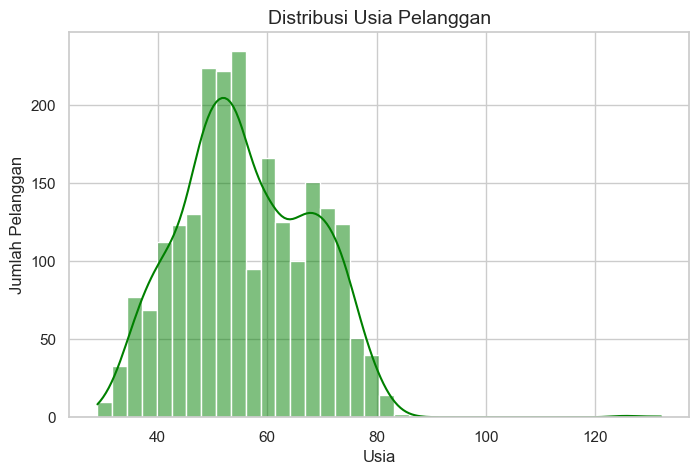

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, color='Green')
plt.title("Distribusi Usia Pelanggan", fontsize=14)
plt.xlabel("Usia")
plt.ylabel("Jumlah Pelanggan")
plt.show()

### Edukasi dan Status Pernikahan

C:\Users\jessi\AppData\Local\Temp\ipykernel_28508\2809265107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  edu_plot = sns.countplot(data=df, x="Education", ax=axes[0], palette="Greens")
C:\Users\jessi\AppData\Local\Temp\ipykernel_28508\2809265107.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  marital_plot = sns.countplot(data=df, x="Marital_Status", ax=axes[1], palette="Greens")


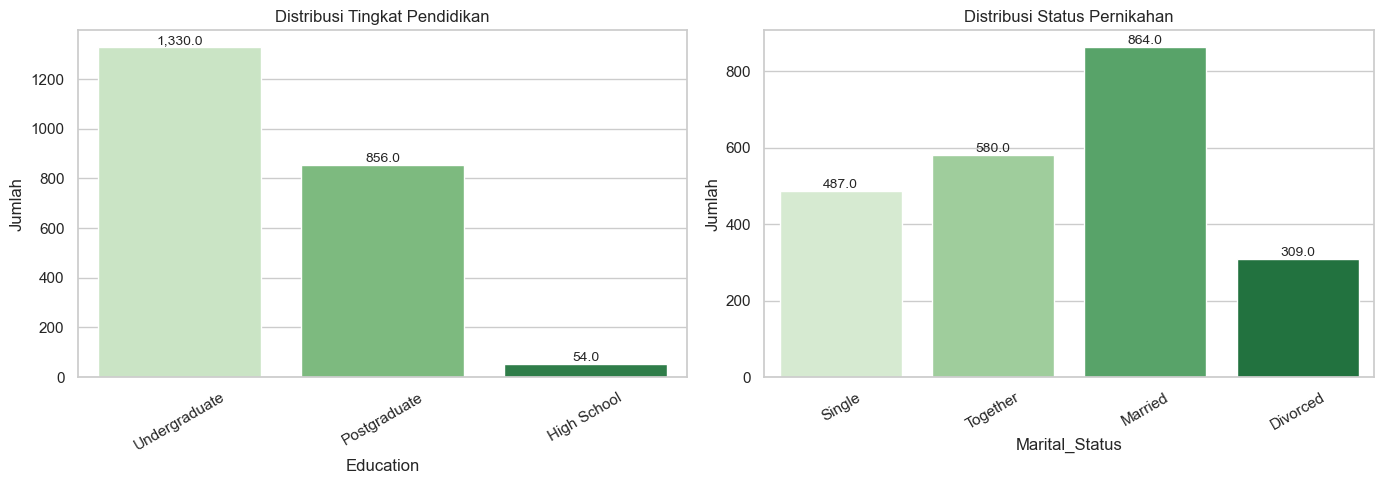

In [17]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

#Education
edu_plot = sns.countplot(data=df, x="Education", ax=axes[0], palette="Greens")
axes[0].set_title("Distribusi Tingkat Pendidikan")
axes[0].set_ylabel("Jumlah")

for p in edu_plot.patches:
    edu_plot.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"{p.get_height():,}",
        ha='center', va='bottom', fontsize=10
    )

# Martial Status
marital_plot = sns.countplot(data=df, x="Marital_Status", ax=axes[1], palette="Greens")
axes[1].set_title("Distribusi Status Pernikahan")
axes[1].set_ylabel("Jumlah")

for p in marital_plot.patches:
    marital_plot.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"{p.get_height():,}",
        ha='center', va='bottom', fontsize=10
    )

for ax in axes:
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

### Distribusi Campaign Response Score

C:\Users\jessi\AppData\Local\Temp\ipykernel_28508\2678587059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  camp_plot = sns.countplot(data=df, x="Campaign_Response_Score", palette="Greens")


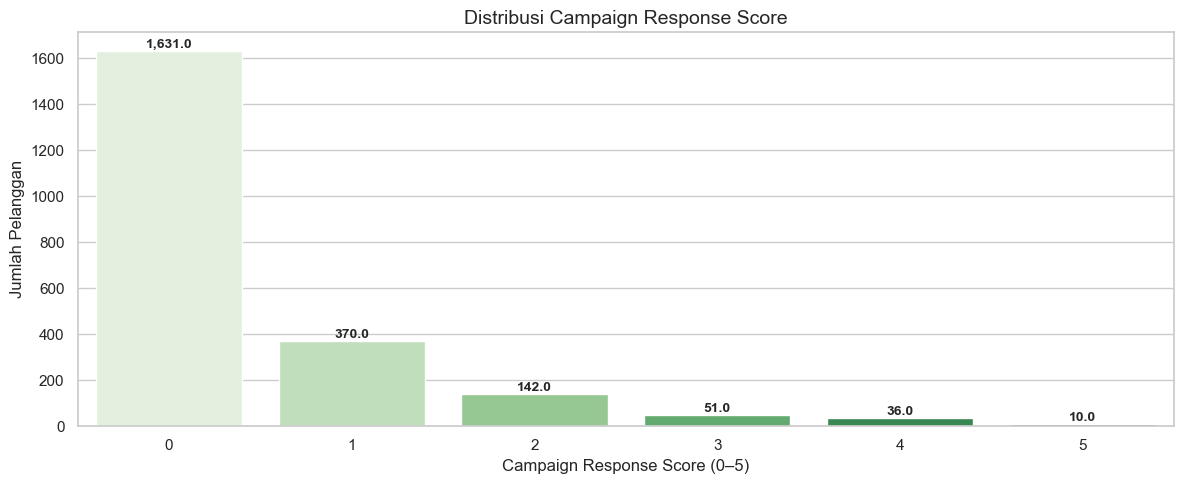

In [18]:
plt.figure(figsize=(12,5))
camp_plot = sns.countplot(data=df, x="Campaign_Response_Score", palette="Greens")

plt.title("Distribusi Campaign Response Score", fontsize=14)
plt.xlabel("Campaign Response Score (0–5)", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)

# Tambahkan label per bar
for p in camp_plot.patches:
    camp_plot.text(
        p.get_x() + p.get_width()/2, 
        p.get_height(), 
        f"{p.get_height():,}", 
        ha='center', va='bottom', fontsize=10, fontweight="bold"
    )

plt.tight_layout()
plt.show()


### Distribusi Family Type (Has Children vs No Children)

C:\Users\jessi\AppData\Local\Temp\ipykernel_28508\315527006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  family_plot = sns.countplot(data=df, x="Family_Type", palette="Greens")


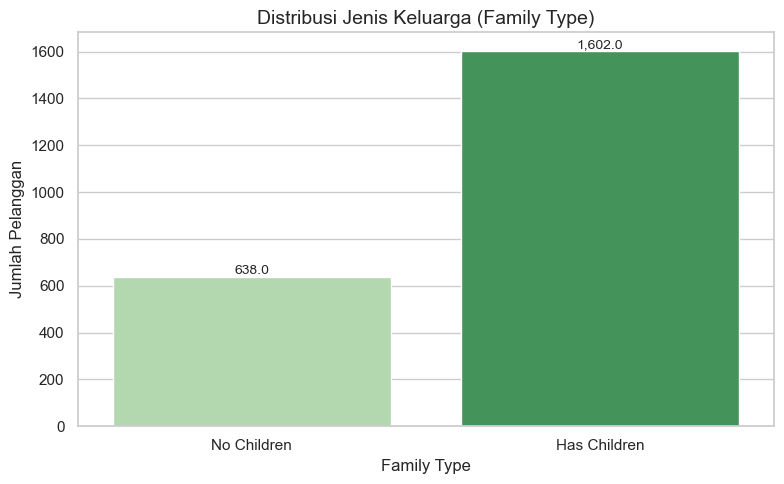

In [19]:
plt.figure(figsize=(8,5))
family_plot = sns.countplot(data=df, x="Family_Type", palette="Greens")

plt.title("Distribusi Jenis Keluarga (Family Type)", fontsize=14)
plt.xlabel("Family Type", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)

# Tambahkan label per bar
for p in family_plot.patches:
    family_plot.text(
        p.get_x() + p.get_width()/2, 
        p.get_height(), 
        f"{p.get_height():,}", 
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

## Membentuk Variabel RFM (Recency, Frequency, Monetary)

In [20]:
rfm = pd.DataFrame()
rfm['Customer_ID'] = df['ID']

# Data sudah tersedia
rfm['Recency'] = df['Recency']
rfm['Education'] = df['Education']
rfm['Marital_Status'] = df['Marital_Status']
rfm['Age_Group'] = df['Age_Group']
rfm['Campaign_Response_Score'] = df['Campaign_Response_Score']
rfm['Family_Type'] = df['Family_Type']


# Frequency dihitung dari jumlah pembelian
rfm['Frequency'] = (
    df['NumWebPurchases'] +
    df['NumCatalogPurchases'] +
    df['NumStorePurchases'] +
    df['NumDealsPurchases']
)

# Monetary dihitung dari total pembelian
spending_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
rfm['Monetary'] = df[spending_cols].sum(axis=1)

rfm.head()


,Customer_ID,Recency,Education,Marital_Status,Age_Group,Campaign_Response_Score,Family_Type,Frequency,Monetary
0,5524,58,Undergraduate,Single,65+,1,No Children,25,1617
1,2174,38,Undergraduate,Single,65+,0,Has Children,6,27
2,4141,26,Undergraduate,Together,55-64,0,No Children,21,776
3,6182,26,Undergraduate,Together,35-44,0,Has Children,8,53
4,5324,94,Postgraduate,Married,35-44,0,Has Children,19,422


## Scoring RFM

In [21]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm.head()

,Customer_ID,Recency,Education,Marital_Status,Age_Group,Campaign_Response_Score,Family_Type,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,5524,58,Undergraduate,Single,65+,1,No Children,25,1617,2,4,4,244
1,2174,38,Undergraduate,Single,65+,0,Has Children,6,27,3,1,1,311
2,4141,26,Undergraduate,Together,55-64,0,No Children,21,776,3,3,3,333
3,6182,26,Undergraduate,Together,35-44,0,Has Children,8,53,3,1,1,311
4,5324,94,Postgraduate,Married,35-44,0,Has Children,19,422,1,3,3,133


## Segmentasi Pelanggan

In [22]:
def customer_segment(score):
    if score.startswith("4"):
        return "Champions"
    elif score.startswith("3"):
        return "Loyal Customers"
    elif score.startswith("2"):
        return "Potential Loyalist"
    else:
        return "At Risk / Lost"

rfm['Segment'] = rfm['R_Score'].astype(str).apply(customer_segment)
rfm

,Customer_ID,Recency,Education,Marital_Status,Age_Group,Campaign_Response_Score,Family_Type,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,5524,58,Undergraduate,Single,65+,1,No Children,25,1617,2,4,4,244,Potential Loyalist
1,2174,38,Undergraduate,Single,65+,0,Has Children,6,27,3,1,1,311,Loyal Customers
2,4141,26,Undergraduate,Together,55-64,0,No Children,21,776,3,3,3,333,Loyal Customers
3,6182,26,Undergraduate,Together,35-44,0,Has Children,8,53,3,1,1,311,Loyal Customers
4,5324,94,Postgraduate,Married,35-44,0,Has Children,19,422,1,3,3,133,At Risk / Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,Undergraduate,Married,55-64,0,Has Children,18,1341,3,3,4,334,Loyal Customers
2236,4001,56,Postgraduate,Together,65+,1,Has Children,22,444,2,4,3,243,Potential Loyalist
2237,7270,91,Undergraduate,Divorced,35-44,1,No Children,19,1241,1,3,4,134,At Risk / Lost
2238,8235,8,Postgraduate,Together,65+,0,Has Children,23,843,4,4,3,443,Champions


## Visualisasi Segmen

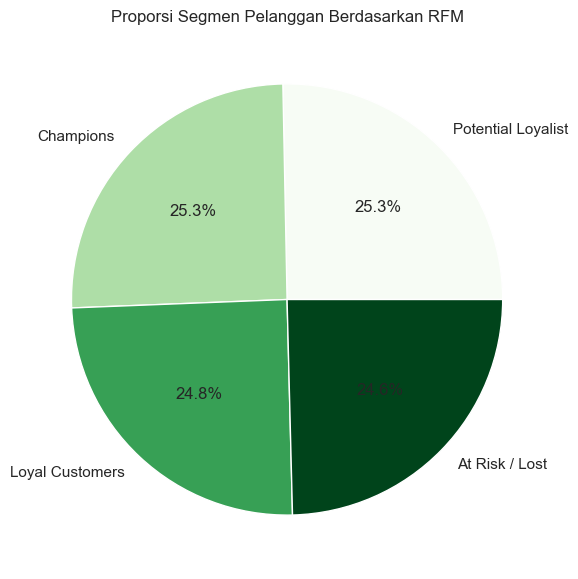

In [23]:
df_pie = rfm['Segment'].value_counts().reset_index()
df_pie.columns = ['Segment', 'Persentase']

# Plot menggunakan Pandas Pie Chart
plt.figure(figsize=(7,7))
df_pie.set_index('Segment')['Persentase'].plot(
    kind='pie',
    autopct="%.1f%%",
    colormap='Greens',
    ylabel=''
)

plt.title("Proporsi Segmen Pelanggan Berdasarkan RFM")
plt.show()


Berdasarkan hasil segmentasi menggunakan metode RFM (Recency, Frequency, Monetary), pelanggan terbagi menjadi empat segmen utama dengan proporsi yang hampir seimbang:
* Potential Loyalist (25.3%)  
  Kelompok terbesar yang menunjukkan potensi untuk ditingkatkan menjadi pelanggan loyal. Mereka masih responsif, tetapi membutuhkan strategi lanjutan seperti onboarding campaign, edukasi program membership, dan penawaran insentif.
* Champions (25.3%)  
  Segmen pelanggan paling bernilai, dengan frekuensi pembelian tinggi dan respon terbaik terhadap kampanye. Strategi yang cocok adalah program eksklusif, VIP benefit, early-access, atau referral program.
* Loyal Customers (24.8%)  
  Pelanggan yang konsisten membeli, namun masih dapat ditingkatkan melalui program cross-selling, bundling, dan loyalty points agar dapat naik ke kategori Champions.
* At Risk / Lost (24.6%)  
  Segmen dengan tingkat risiko churn paling tinggi. Mereka jarang bertransaksi atau menunjukkan penurunan aktivitas. Perlu strategi pemulihan seperti reminder promo, voucher win-back, push notification personalisasi, atau email re-engagement.

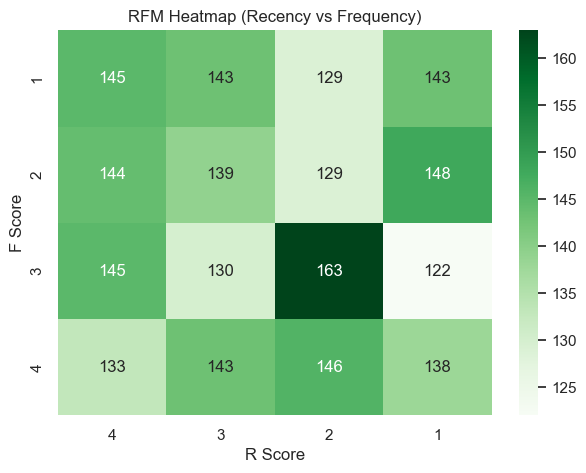

In [28]:
heatmap_rfm = pd.crosstab(rfm['F_Score'], rfm['R_Score'])

plt.figure(figsize=(7,5))
sns.heatmap(heatmap_rfm, annot=True, cmap="Greens", fmt="d")
plt.title("RFM Heatmap (Recency vs Frequency)")
plt.xlabel("R Score")
plt.ylabel("F Score")
plt.show()

Interpretasi RFM Heatmap (Recency vs Frequency)  
-> Heatmap ini menunjukkan distribusi pelanggan berdasarkan dua metrik utama dalam RFM:  

* Recency (R Score): Seberapa baru pelanggan terakhir bertransaksi  
  (Semakin tinggi skor → semakin baru aktivitas pembelian)

* Frequency (F Score): Seberapa sering pelanggan melakukan pembelian  
  (Semakin tinggi skor → semakin sering bertransaksi)

Insight Utama dari Heatmap  
* Sel dengan nilai tertinggi (163) terdapat pada kombinasi:  
  R Score = 3 & F Score = 3  
  Artinya, kelompok terbesar adalah pelanggan yang:
  * Bertransaksi cukup baru (tidak terlalu lama terakhir membeli)  
  * Memiliki frekuensi pembelian yang cukup konsisten  
    -> Ini kategori pelanggan potensial untuk loyalitas dan upselling.  

* Skor tinggi juga muncul pada kombinasi R4–F1 dan R1–F4  
  Ini menunjukkan ada dua pola ekstrem:  
  * Pelanggan baru tapi jarang membeli  
  * Pelanggan lama tapi pernah membeli sangat sering  
    Kedua kelompok ini memerlukan strategi pemasaran berbeda (onboarding vs win-back)  

* Nilai terendah berada pada kombinasi R2–F3 (122)
  Ini merupakan pelanggan yang:
  * Sudah agak lama tidak bertransaksi
  * Namun pernah cukup sering berbelanja
    Segmen ini berisiko churn dan perlu aktivasi ulang.

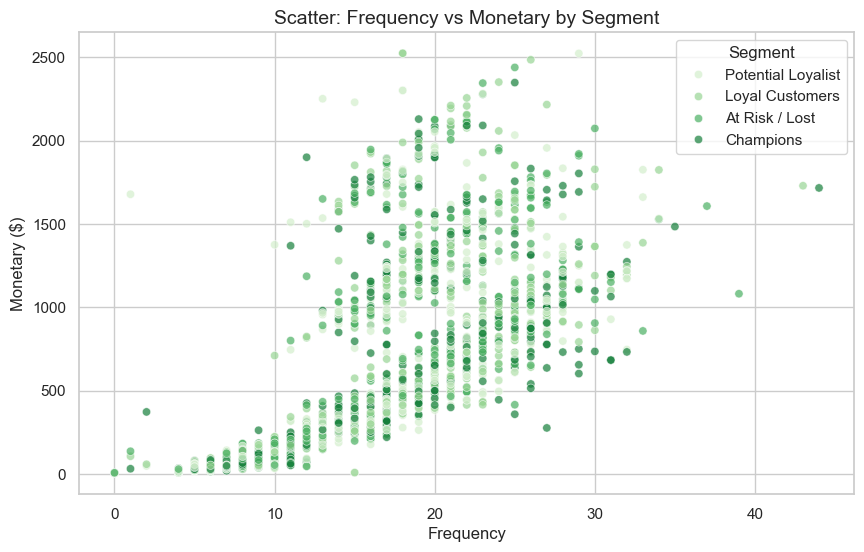

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Greens', alpha=0.7)

plt.title("Scatter: Frequency vs Monetary by Segment", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Monetary ($)")
plt.legend(title="Segment")
plt.show()

Grafik ini memperlihatkan hubungan antara frekuensi pembelian dan total nilai transaksi pelanggan berdasarkan segmentasi RFM. Terlihat adanya kecenderungan yang jelas bahwa semakin sering pelanggan berbelanja, semakin besar nilai pembelian yang mereka hasilkan. Segmen Champions mendominasi area dengan frekuensi dan nilai transaksi tertinggi, menunjukkan mereka sebagai kelompok paling bernilai bagi bisnis.

Sementara itu, segmen Loyal Customers berada pada posisi menengah dan stabil, namun masih memiliki potensi untuk ditingkatkan melalui strategi upselling dan cross-selling. Potential Loyalist menunjukkan perilaku pembelian yang cukup menjanjikan, namun masih membutuhkan dorongan untuk mencapai level loyalitas yang lebih tinggi. Di sisi lain, segmen At Risk / Lost tampak berada pada frekuensi dan nilai transaksi terendah, mengindikasikan perlunya strategi re-engagement agar mereka kembali aktif dalam pembelian.

C:\Users\jessi\AppData\Local\Temp\ipykernel_28508\3897820557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response.values, y=avg_response.index, palette="Greens")


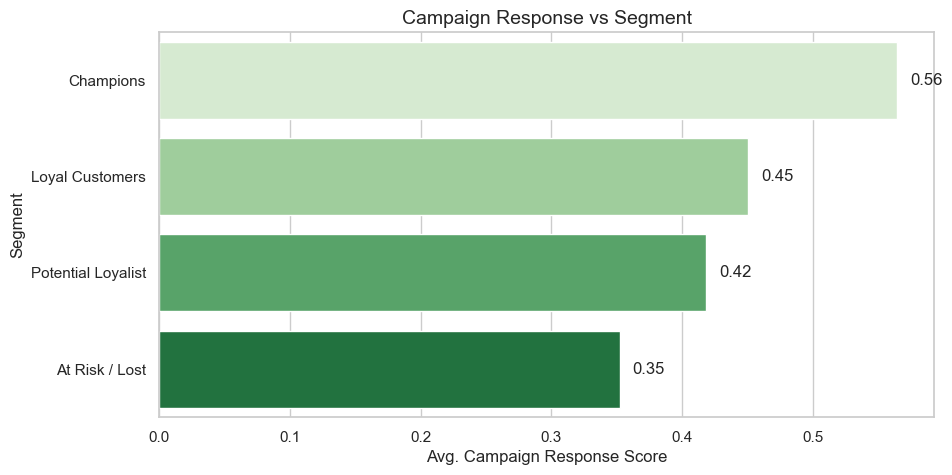

In [32]:
avg_response = rfm.groupby('Segment')['Campaign_Response_Score'].mean().sort_values(ascending=False)
avg_response

plt.figure(figsize=(10,5))
sns.barplot(x=avg_response.values, y=avg_response.index, palette="Greens")

for index, value in enumerate(avg_response.values):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.title("Campaign Response vs Segment", fontsize=14)
plt.xlabel("Avg. Campaign Response Score")
plt.ylabel("Segment")
plt.show()

Grafik ini menunjukkan perbandingan rata-rata respons pelanggan terhadap kampanye pemasaran berdasarkan segmentasi RFM. Dari hasil analisis, terlihat bahwa segmen Champions memiliki tingkat respons tertinggi, yaitu sekitar 0.56. Ini menunjukkan bahwa pelanggan pada segmen ini sangat responsif terhadap penawaran, promo, ataupun program loyalitas yang diberikan — sehingga mereka menjadi target paling ideal untuk kampanye eksklusif dan high-value personalization.

Segmen Loyal Customers berada di posisi kedua dengan skor 0.45. Mereka sudah memiliki kebiasaan belanja yang konsisten dan cukup responsif terhadap promosi, sehingga strategi seperti cross-selling, bundling, atau program poin dapat mendorong mereka naik ke level Champions.

Sementara itu, segmen Potential Loyalist memiliki respons yang cukup moderat (0.42) yang menunjukkan adanya potensi untuk tumbuh. Dengan dorongan berupa onboarding campaign, reminder, atau insentif khusus, mereka dapat dikonversi menjadi pelanggan yang lebih aktif.

Di sisi lain, segmen At Risk / Lost memiliki respons terendah yaitu 0.35, menandakan bahwa pelanggan di kategori ini mulai kehilangan minat atau sudah beralih ke kompetitor. Untuk kelompok ini, strategi win-back seperti diskon personalisasi, reminder produk favorit, atau re-engagement campaign menjadi sangat penting untuk mencegah churn lebih lanjut.

## Insight & Rekomendasi

In [25]:
segment_summary = rfm.groupby("Segment").agg({
    "Customer_ID":"count",
    "Recency":"mean",
    "Frequency":"mean",
    "Monetary":"mean"
}).sort_values(by="Monetary", ascending=False)

segment_summary


,Customer_ID,Recency,Frequency,Monetary
Segment,,,,
Potential Loyalist,567,61.832451,15.393298,647.915344
Loyal Customers,555,36.823423,14.763964,599.609009
At Risk / Lost,551,86.907441,14.526316,596.437387
Champions,567,11.680776,14.753086,578.835979


## Export Data

In [26]:
rfm.to_csv("Customer_RFM_Segmentation.csv", sep=';', index=False)
print("File berhasil diekspor")
rfm

File berhasil diekspor


,Customer_ID,Recency,Education,Marital_Status,Age_Group,Campaign_Response_Score,Family_Type,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,5524,58,Undergraduate,Single,65+,1,No Children,25,1617,2,4,4,244,Potential Loyalist
1,2174,38,Undergraduate,Single,65+,0,Has Children,6,27,3,1,1,311,Loyal Customers
2,4141,26,Undergraduate,Together,55-64,0,No Children,21,776,3,3,3,333,Loyal Customers
3,6182,26,Undergraduate,Together,35-44,0,Has Children,8,53,3,1,1,311,Loyal Customers
4,5324,94,Postgraduate,Married,35-44,0,Has Children,19,422,1,3,3,133,At Risk / Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,Undergraduate,Married,55-64,0,Has Children,18,1341,3,3,4,334,Loyal Customers
2236,4001,56,Postgraduate,Together,65+,1,Has Children,22,444,2,4,3,243,Potential Loyalist
2237,7270,91,Undergraduate,Divorced,35-44,1,No Children,19,1241,1,3,4,134,At Risk / Lost
2238,8235,8,Postgraduate,Together,65+,0,Has Children,23,843,4,4,3,443,Champions


## Kesimpulan dan Rekomendasi

### Kesimpulan
Berdasarkan hasil analisis rata-rata campaign response per segmentasi pelanggan, terlihat adanya perbedaan pola keterlibatan antara segmen pelanggan:  
* Champions (0.56)  
  Merupakan segmen dengan tingkat respons paling tinggi. Mereka sangat aktif dan antusias terhadap penawaran, promosi, serta program loyalitas.  
* Loyal Customers (0.45)  
  Segmen ini memiliki respons yang cukup kuat, namun masih bisa ditingkatkan agar mencapai level Champions.  
* Potential Loyalist (0.42)  
  Respons berada pada level sedang. Ini menunjukkan bahwa segmen ini berpotensi besar untuk dikembangkan lebih lanjut sehingga dapat menjadi pelanggan loyal.  
* At Risk / Lost (0.35)  
  Segmen dengan respons paling rendah. Indikasi adanya kecenderungan churn atau menurunnya minat terhadap brand.  
  
Secara keseluruhan, dapat disimpulkan bahwa semakin tinggi tingkat loyalitas pelanggan, semakin besar kemungkinan mereka untuk merespons kampanye marketing yang diberikan.

### Rekomendasi Strategi
Agar hasil kampanye lebih optimal, strategi pemasaran dapat disesuaikan berdasarkan karakteristik setiap segmen:
* Untuk Champions:  
  Pertahankan keterlibatan mereka melalui program VIP, benefit eksklusif, reward tambahan, akses early product, dan referral program untuk mendorong advocacy.  
* Untuk Loyal Customers:  
  Berikan insentif agar mereka naik ke segmen Champions, seperti bundling promo, tier upgrade benefits, atau loyalty multiplier points.  
* Untuk Potential Loyalist:  
  Fokus pada nurturing melalui edukasi produk, personalisasi rekomendasi, reminder kampanye, promo onboarding, serta program retensi awal.  
* Untuk At Risk / Lost:  
  Terapkan strategi win-back campaign seperti voucher spesial, limited time offer, survey feedback, atau pesan personal untuk menghindari churn lebih lanjut.  